<a href="https://colab.research.google.com/github/Viktoriia3/Homework3/blob/main/%22Homework_3%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/da-python/new-modul-python/blob/main/Lesson3/hometask/SyntheticRubber.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [102]:
import yfinance as yf
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os 

In [ ]:
crude_oil_ticker = "CL=F"
euro_usd = 'EURUSD=X'
usd_rub = 'RUB=X'
crude_oil = yf.Ticker(crude_oil_ticker)
#hist = crude_oil.history()
Oil_price_all = yf.download(crude_oil_ticker)
euro_price_all = yf.download(euro_usd)
rub_price_all = yf.download(usd_rub)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Синтетический каучук" (СК), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на СК. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


* СК производиться из нефти. Один из известных способов производства предполагает, что из 10 баррелей нефти сделают одну тонну СК, а затраты на производство в районе 400 евро.

In [ ]:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    },
    #Добавил покупателя из России
    'Andrey':{
        'location':'RU',
        'volumes': 400,
        'comment': 'moving_average'
    }
}
# Скидки
discounts = {'99': 0.01, # до 100 тонн 1%
             '299': 0.05, #  до 300 тонн 5%
             '300': 0.1}   # больше 300 тонн 10%

In [ ]:
#данные с датой и ценой
Oil_price = pd.DataFrame(Oil_price_all, columns = ['Close'])
euro_price = pd.DataFrame(euro_price_all, columns = ['Close'])
oil_and_euro = pd.merge(Oil_price.reset_index(), euro_price.reset_index(), on=('Date') , how='inner')

In [ ]:
# добавляем новый столбец с добавленной ценой 400 евро + их в $
oil_euro_cost = oil_and_euro.assign(cost = 10*oil_and_euro['Close_x']+ 400*oil_and_euro['Close_y'])

In [ ]:
#2022 год
oil_euro_cost_2022 = oil_euro_cost[oil_euro_cost['Date']>='2022-01-01']
oil_euro_cost_2022 = oil_euro_cost_2022[oil_euro_cost_2022['Date']<'2023-01-01']
oil_euro_cost_2022 = oil_euro_cost_2022.reset_index(drop=True)

In [ ]:
rubberprice=[]
for i in range(1,13):
    if len(str(i))==1:
        i=str(i)
        i= '0'+i
    else: i=str(i)
    print(i) 
    year = '2022'
    month = i
    url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={month}&year={year}"
    res = requests.get(url)
    rj = res.json()
    df =pd.DataFrame(rj)
    rubberprice.append(df)  
rubberprice_df =pd.concat(rubberprice, axis=0)
rubberprice_df = rubberprice_df.reset_index(drop=True) 

01
02
03
04
05
06
07
08
09
10
11
12


In [ ]:
rubberprice_df_cv = rubberprice_df[rubberprice_df['grade']== 'SMR CV']
rubberprice_df_cv = rubberprice_df_cv.reset_index(drop=True) 
rubberprice_df_cv['us']=rubberprice_df_cv['us'].apply(pd.to_numeric)

In [ ]:
#стоимость за тонну, в долларах
rubberprice_df_cv_new = rubberprice_df_cv.assign(USD = rubberprice_df_cv['us']*10)

In [ ]:
#отставляем только 22 год
rubberprice_df_cv_2022 = rubberprice_df_cv_new[rubberprice_df_cv_new['date']>='2022-01-01']
rubberprice_df_cv_2022 = rubberprice_df_cv_new[rubberprice_df_cv_new['date']<'2023-01-01']
rubberprice_df_cv_2022['date']=pd.to_datetime(rubberprice_df_cv_2022['date'])

In [ ]:
all = pd.merge(oil_euro_cost_2022, rubberprice_df_cv_2022, left_on =('Date'), right_on =('date'),  how='inner')

In [ ]:
all['compare'] = all['cost'] < all['USD']
all

,Date,Close_x,Close_y,cost,date,grade,masa,rm,us,tone,USD,compare
0,2022-01-03,76.080002,1.137346,1215.738382,2022-01-03,SMR CV,Noon,895.00,218.35,Steady,2183.5,True
1,2022-01-04,76.989998,1.130224,1221.989765,2022-01-04,SMR CV,Noon,917.50,223.15,Slightly steadier,2231.5,True
2,2022-01-05,77.849998,1.128363,1229.844999,2022-01-05,SMR CV,Noon,940.00,228.20,Steadier,2282.0,True
3,2022-01-06,79.459999,1.131350,1247.139864,2022-01-06,SMR CV,Noon,952.50,230.55,Steady,2305.5,True
4,2022-01-07,78.900002,1.129688,1240.875273,2022-01-07,SMR CV,Noon,972.50,234.60,Steady,2346.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
230,2022-12-23,79.559998,1.060333,1219.733181,2022-12-23,SMR CV,Noon,823.50,189.10,Quiet,1891.0,True
231,2022-12-27,79.529999,1.064022,1220.908861,2022-12-27,SMR CV,Noon,821.50,189.05,Quiet,1890.5,True
232,2022-12-28,78.959999,1.063717,1215.086651,2022-12-28,SMR CV,Noon,812.50,186.60,Quietly Steady,1866.0,True
233,2022-12-29,78.400002,1.062925,1209.170055,2022-12-29,SMR CV,Noon,804.00,184.60,Quiet,1846.0,True


In [ ]:
all_plot = all[['Date','cost']]
all_plot = all_plot.round({'cost': 0})
all_plot_graf = all_plot.set_index('Date')['cost']

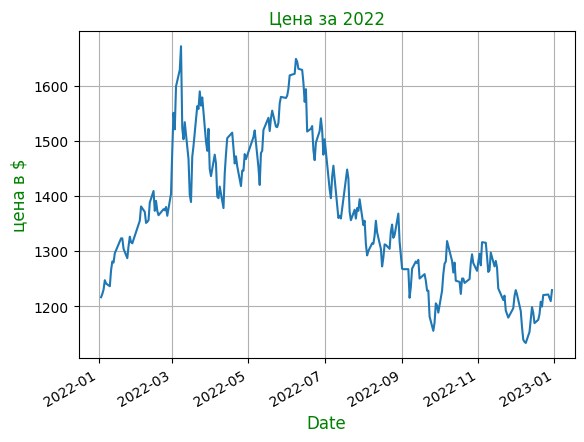

In [ ]:
from pylab import rcParams
title_dict = {'fontsize':12, 
              'color':'Green'}
plt.title('Цена за 2022', fontdict=title_dict)
plt.xlabel('Дата', fontdict=title_dict)
plt.ylabel('цена в $', fontdict=title_dict)
all_plot_graf.plot()
plt.grid()
plt.show()

In [ ]:
total_cost_for_customers = oil_euro_cost_2022
for x in range(0,len(customers)):
    customer = customers[list(customers.keys())[x]]
    name_customer= list(customers.keys())[x]
    volum = customers[list(customers.keys())[x]]['volumes']
    if volum <= int(list(discounts.keys())[0]):
        sale = 1-(discounts[list(discounts.keys())[0]])
        #print(sale)
    elif volum > int(list(discounts.keys())[0]) and volum <= int(list(discounts.keys())[1]):
        sale = 1-(discounts[list(discounts.keys())[1]])
        #print(sale)
    elif volum >= int(list(discounts.keys())[2]):
        sale = 1-(discounts[list(discounts.keys())[2]])
    else: sale = 1
        #print(sale)
    if customers[list(customers.keys())[x]]['location'] == 'EU':
        region = EU_LOGISTIC_COST_EUR
    elif customers[list(customers.keys())[x]]['location'] == 'CN':
        region = CN_LOGISTIC_COST_USD
    else: region = 1
    total_cost_for_customers[name_customer] = total_cost_for_customers['cost'].apply(lambda x: 0.000001*x*volum*region*sale)

In [ ]:
total_cost_for_customers

,Date,Close_x,Close_y,cost,Monty,Triangle,Stone,Poly,Andrey
0,2022-01-03,76.080002,1.137346,1215.738382,6.929709,4.693966,5.197282,2.527520,0.437666
1,2022-01-04,76.989998,1.130224,1221.989765,6.965342,4.718102,5.224006,2.540517,0.439916
2,2022-01-05,77.849998,1.128363,1229.844999,7.010116,4.748432,5.257587,2.556848,0.442744
3,2022-01-06,79.459999,1.131350,1247.139864,7.108697,4.815207,5.331523,2.592804,0.448970
4,2022-01-07,78.900002,1.129688,1240.875273,7.072989,4.791019,5.304742,2.579780,0.446715
...,...,...,...,...,...,...,...,...,...
247,2022-12-23,79.559998,1.060333,1219.733181,6.952479,4.709390,5.214359,2.535825,0.439104
248,2022-12-27,79.529999,1.064022,1220.908861,6.959181,4.713929,5.219385,2.538270,0.439527
249,2022-12-28,78.959999,1.063717,1215.086651,6.925994,4.691450,5.194495,2.526165,0.437431
250,2022-12-29,78.400002,1.062925,1209.170055,6.892269,4.668606,5.169202,2.513865,0.435301


In [ ]:
cost_for_customers_excel = total_cost_for_customers
cost_for_customers_excel.index = cost_for_customers_excel['Date']
cost_for_customers_excel = cost_for_customers_excel.resample('M').mean()
cost_for_customers_excel = cost_for_customers_excel.reset_index() 

In [ ]:
xlfilepath = 'prices_for_customers.xlsx'
with pd.ExcelWriter(xlfilepath) as writer:
    for x in range(0,len(customers)):
        customer = customers[list(customers.keys())[x]]
        name_customer= list(customers.keys())[x]
        volum = customers[list(customers.keys())[x]]['volumes']
        
        if volum <= int(list(discounts.keys())[0]):
            sale = 100*(discounts[list(discounts.keys())[0]])
        elif volum > int(list(discounts.keys())[0]) and volum <= int(list(discounts.keys())[1]):
            sale = 100*(discounts[list(discounts.keys())[1]])
        elif volum >= int(list(discounts.keys())[2]):
            sale = 100*(discounts[list(discounts.keys())[2]])
        else: sale = 0
  
        if customers[list(customers.keys())[x]]['location'] == 'EU':
            region2 = EU_LOGISTIC_COST_EUR
        elif customers[list(customers.keys())[x]]['location'] == 'CN':
            region2 = CN_LOGISTIC_COST_USD
        else:
            region2 = 0

        customer_df = pd.DataFrame(cost_for_customers_excel, columns = ['Date', 'cost', name_customer])
        customer_df = customer_df.rename(columns = {name_customer : 'cust_cost'})
        customer_df.Date = customer_df.Date.dt.strftime('%B %Y')


        customer_df_graf = customer_df.set_index('Date')['cust_cost']
        plt.title('Цена за 2022', fontdict=title_dict)
        plt.xlabel('Дата', fontdict=title_dict)
        plt.ylabel('Цена в $', fontdict=title_dict)
        customer_df_graf.plot()
        plt.grid()
        plt.savefig(f'{name_customer}_price.png')
        plt.close()
        

        max_row, max_col = customer_df.shape
        customer_df.to_excel(writer, sheet_name=name_customer, startrow=2, header=False, index=False)
        workbook = writer.book
        worksheet = writer.sheets[name_customer]
        column_settings = [{'header': column} for column in customer_df.columns]


# Задание 2

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

In [ ]:
customer_path = 'for_customer'
os.makedirs(customer_path, exist_ok=True)
for customer_name, customer_info in customers.items():
  customer_df = pd.DataFrame.copy()
  
  if customer_info.get('location') == 'EU':
    customer_df['logistics'] = EU_LOGISTIC_COST_EUR
    customer_df['logistics'] = customer_df['Euro_rate'] * EU_LOGISTIC_COST_EUR
  elif customer_info.get('location') == 'CN':
    customer_df['logistics'] = CN_LOGISTIC_COST_USD
  
  if customer_info.get('volumes'):
    customer_df['volumes'] = customer_info.get('volumes')

  customer_df['discount'] = customer_df['volumes'].apply(discount_percent)
  customer_df['CK_price_usd'] = customer_df['CK_price'] * (1-customer_df['discount']) + customer_df['logistics']
  
  customer_df = customer_df.round(2)
  customer_df = customer_df.reset_index()
  customer_df.Date = customer_df.Date.dt.strftime('%B %Y')
  
  max_row, max_col = customer_df.shape

  xlfilepath = os.path.join(customer_df, f'{customer_name}_CK_prices.xlsx')
  with pd.ExcelWriter(xlfilepath) as writer:
    customer_df.to_excel(writer, sheet_name=client_name, startrow=1, header=False, index=False)
    workbook = writer.book
    worksheet = writer.sheets[client_name]
    column_settings = [{'header': column} for column in client_df.columns]

# Задание 3

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать СК для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать СК с завода самостоятельно.
На основе тех данных, которые уже есть предложите цену новому клиенту в рублях. 



In [109]:
rub_price = pd.DataFrame(rub_price_all, columns = ['Close'])
rub_price = rub_price.reset_index()
rub_price_2022 = rub_price[rub_price['Date']>='2022-01-01']
rub_price_2022 = rub_price_2022[rub_price_2022['Date']<'2023-01-01']
rub_price_2022 = rub_price_2022.reset_index(drop=True)

In [110]:
rubberprice_2022 = pd.DataFrame(total_cost_for_customers, columns = ['Date' , 'Andrey'])
rubberprice_2022 = rubberprice_2022.reset_index(drop=True)

In [111]:
rubberprice_2022_ru = pd.merge(rubberprice_2022, rub_price_2022, on=('Date') , how='inner')
rubberprice_2022_ru_cost = rubberprice_2022_ru.assign(Andrey_ru = rubberprice_2022_ru['Andrey']*rubberprice_2022_ru['Close'])
rubberprice_2022_ru_cost

,Date,Andrey,Close,Andrey_ru
0,2022-01-03,0.437666,74.986000,32.818809
1,2022-01-04,0.439916,74.371803,32.717370
2,2022-01-05,0.442744,75.263000,33.322257
3,2022-01-06,0.448970,76.661598,34.418785
4,2022-01-07,0.446715,76.353699,34.108350
...,...,...,...,...
247,2022-12-23,0.439104,68.214996,29.953474
248,2022-12-27,0.439527,68.330002,30.032894
249,2022-12-28,0.437431,69.964996,30.604872
250,2022-12-29,0.435301,72.714996,31.652927


In [114]:
rubberprice_2022 = pd.DataFrame(total_cost_for_customers, columns = ['Date' , 'Poly'])
rubberprice_2022 = rubberprice_2022.reset_index(drop=True)

In [115]:
rubberprice_2022_ru = pd.merge(rubberprice_2022, rub_price_2022, on=('Date') , how='inner')
rubberprice_2022_ru_cost = rubberprice_2022_ru.assign(Poly_ru = rubberprice_2022_ru['Poly']*rubberprice_2022_ru['Close'])
rubberprice_2022_ru_cost

,Date,Poly,Close,Poly_ru
0,2022-01-03,2.527520,74.986000,189.528622
1,2022-01-04,2.540517,74.371803,188.942810
2,2022-01-05,2.556848,75.263000,192.436034
3,2022-01-06,2.592804,76.661598,198.768481
4,2022-01-07,2.579780,76.353699,196.975721
...,...,...,...,...
247,2022-12-23,2.535825,68.214996,172.981312
248,2022-12-27,2.538270,68.330002,173.439961
249,2022-12-28,2.526165,69.964996,176.743135
250,2022-12-29,2.513865,72.714996,182.795651


In [122]:
rubberprice_2022 = pd.DataFrame(total_cost_for_customers, columns = ['Date' , 'Stone'])
rubberprice_2022 = rubberprice_2022.reset_index(drop=True)

In [124]:
rubberprice_2022_ru = pd.merge(rubberprice_2022, rub_price_2022, on=('Date') , how='inner')
rubberprice_2022_ru_cost = rubberprice_2022_ru.assign(Stone_ru = rubberprice_2022_ru['Stone']*rubberprice_2022_ru['Close'])
rubberprice_2022_ru_cost

,Date,Stone,Close,Stone_ru
0,2022-01-03,5.197282,74.986000,389.723357
1,2022-01-04,5.224006,74.371803,388.518765
2,2022-01-05,5.257587,75.263000,395.701801
3,2022-01-06,5.331523,76.661598,408.723068
4,2022-01-07,5.304742,76.353699,405.036657
...,...,...,...,...
247,2022-12-23,5.214359,68.214996,355.697504
248,2022-12-27,5.219385,68.330002,356.640613
249,2022-12-28,5.194495,69.964996,363.432854
250,2022-12-29,5.169202,72.714996,375.878504


In [125]:
rubberprice_2022 = pd.DataFrame(total_cost_for_customers, columns = ['Date' , 'Triangle'])
rubberprice_2022 = rubberprice_2022.reset_index(drop=True)

In [126]:
rubberprice_2022_ru = pd.merge(rubberprice_2022, rub_price_2022, on=('Date') , how='inner')
rubberprice_2022_ru_cost = rubberprice_2022_ru.assign(Triangle_ru = rubberprice_2022_ru['Triangle']*rubberprice_2022_ru['Close'])
rubberprice_2022_ru_cost

,Date,Triangle,Close,Triangle_ru
0,2022-01-03,4.693966,74.986000,351.981727
1,2022-01-04,4.718102,74.371803,350.893790
2,2022-01-05,4.748432,75.263000,357.381205
3,2022-01-06,4.815207,76.661598,369.141465
4,2022-01-07,4.791019,76.353699,365.812054
...,...,...,...,...
247,2022-12-23,4.709390,68.214996,321.251009
248,2022-12-27,4.713929,68.330002,322.102785
249,2022-12-28,4.691450,69.964996,328.237251
250,2022-12-29,4.668606,72.714996,339.477638


In [127]:
rubberprice_2022 = pd.DataFrame(total_cost_for_customers, columns = ['Date' , 'Monty'])
rubberprice_2022 = rubberprice_2022.reset_index(drop=True)

In [128]:
rubberprice_2022_ru = pd.merge(rubberprice_2022, rub_price_2022, on=('Date') , how='inner')
rubberprice_2022_ru_cost = rubberprice_2022_ru.assign(Monty_ru = rubberprice_2022_ru['Monty']*rubberprice_2022_ru['Close'])
rubberprice_2022_ru_cost

,Date,Monty,Close,Monty_ru
0,2022-01-03,6.929709,74.986000,519.631143
1,2022-01-04,6.965342,74.371803,518.025020
2,2022-01-05,7.010116,75.263000,527.602401
3,2022-01-06,7.108697,76.661598,544.964090
4,2022-01-07,7.072989,76.353699,540.048875
...,...,...,...,...
247,2022-12-23,6.952479,68.214996,474.263339
248,2022-12-27,6.959181,68.330002,475.520817
249,2022-12-28,6.925994,69.964996,484.577139
250,2022-12-29,6.892269,72.714996,501.171338
